In this notebook, I will compare tanzanian ancestry and the degree of selection inferred in each window

In [1]:
%run ../scripts/notebook_settings_lean.py

/faststorage/project/baboondiversity/people/eriks/second_analysis_baboons/scripts/notebook_settings_lean.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'png')


In [2]:
idfile_path = "/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/idfile_8_cluster_females.ids"
idfile = pd.read_csv(idfile_path, sep=" ", names=["PGDP_ID", "pop", "inclusion"])
idfile["ID_index"] = idfile.index
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")
mapping = {}
for i, row in meta_data_samples.iterrows():
    if row.PGDP_ID[0] != "P":
        mapping["Sci_"+row.PGDP_ID] = row.Origin
    else:
        mapping[row.PGDP_ID] = row.Origin

In [3]:
df_l = []
baboon_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis"
for population in ['anubis_tanzania']:
    for chrom in ["8", "X"]:
        for ind in idfile.loc[(idfile["pop"] == population) & (idfile.inclusion == 1)].PGDP_ID:
            name = population+"_chr"+chrom+"_8_cluster_"+ind+".txt"
            ind_df = pd.read_csv(baboon_path+"/steps/paint_summary/"+name, sep=" ")
            ind_df["PGDP_ID"] = ind
            ind_df["chrom"] = chrom
            df_l.append(ind_df)
a_8_df = pd.concat(df_l)
a_8_df["north"] = a_8_df.anubis_ethiopia+a_8_df.hamadryas+a_8_df.papio
a_8_df["norm_north"] = (a_8_df.north-a_8_df.iloc[:,1:8].sum(axis=1)/2)
a_8_df["percent_north"] = (a_8_df.north/a_8_df.iloc[:,1:8].sum(axis=1))
a_8_df["pop"] = a_8_df["PGDP_ID"].map(mapping)
a_8_df["start"] = a_8_df["windows"]

Loading in the selection strength - chrX first

In [4]:
window_size = 100000

relate_sele = pd.read_csv("../results/all_individuals_relate/chromX_selection.sele", sep=" ")

In [5]:
chrX_df = a_8_df.loc[a_8_df.chrom == "X"]
windows = sorted(chrX_df.windows.unique())

In [6]:
window_dir = {}
for i in range(len(windows)-1):
    sub_df = relate_sele.loc[(relate_sele.pos >= windows[i]) & (relate_sele.pos < windows[i+1])]
    window_dir[windows[i]] = sub_df["when_mutation_has_freq2"].min()

In [7]:
chrX_df["sele"] = -chrX_df.windows.map(window_dir)

/scratch/5091786/ipykernel_35785/705275964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chrX_df["sele"] = -chrX_df.windows.map(window_dir)


In [8]:
chrX_df = chrX_df.reset_index()
chrX_df

,index,windows,anubis_ethiopia,cyno_central,cyno_western,hamadryas,kindae,papio,ursinus,PGDP_ID,chrom,north,norm_north,percent_north,pop,start,sele
0,0,2500022,274485.0,152198.0,337372.0,1121112.0,0.0,69015.0,45818.0,PD_0199,X,1464612.0,464612.0,0.732306,"Serengeti, Tanzania",2500022,7.50429
1,1,2600022,0.0,0.0,1650009.0,292489.0,0.0,57502.0,0.0,PD_0199,X,349991.0,-650009.0,0.174995,"Serengeti, Tanzania",2600022,8.45612
2,2,2700022,656975.0,0.0,1308073.0,34952.0,0.0,0.0,0.0,PD_0199,X,691927.0,-308073.0,0.345963,"Serengeti, Tanzania",2700022,5.37071
3,3,2800022,440069.0,1810.0,991988.0,501100.0,65033.0,0.0,0.0,PD_0199,X,941169.0,-58831.0,0.470585,"Serengeti, Tanzania",2800022,4.68321
4,4,2900022,418414.0,0.0,1263296.0,11102.0,117.0,307071.0,0.0,PD_0199,X,736587.0,-263413.0,0.368293,"Serengeti, Tanzania",2900022,6.62478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60711,1407,143200022,10718.0,67629.0,748510.0,1169034.0,0.0,4109.0,0.0,PD_0686,X,1183861.0,183861.0,0.591931,"Lake Manyara, Tanzania",143200022,2.90211
60712,1408,143300022,39235.0,714890.0,1235503.0,10372.0,0.0,0.0,0.0,PD_0686,X,49607.0,-950393.0,0.024803,"Lake Manyara, Tanzania",143300022,2.90211
60713,1409,143400022,13029.0,497889.0,715249.0,772339.0,916.0,578.0,0.0,PD_0686,X,785946.0,-214054.0,0.392973,"Lake Manyara, Tanzania",143400022,4.13758
60714,1410,143500022,0.0,300000.0,1700000.0,0.0,0.0,0.0,0.0,PD_0686,X,0.0,-1000000.0,0.000000,"Lake Manyara, Tanzania",143500022,4.72265


In [9]:
relate_sele["-log10 P-value"] = -relate_sele["when_mutation_has_freq2"]

[(3.0, 12.0)]

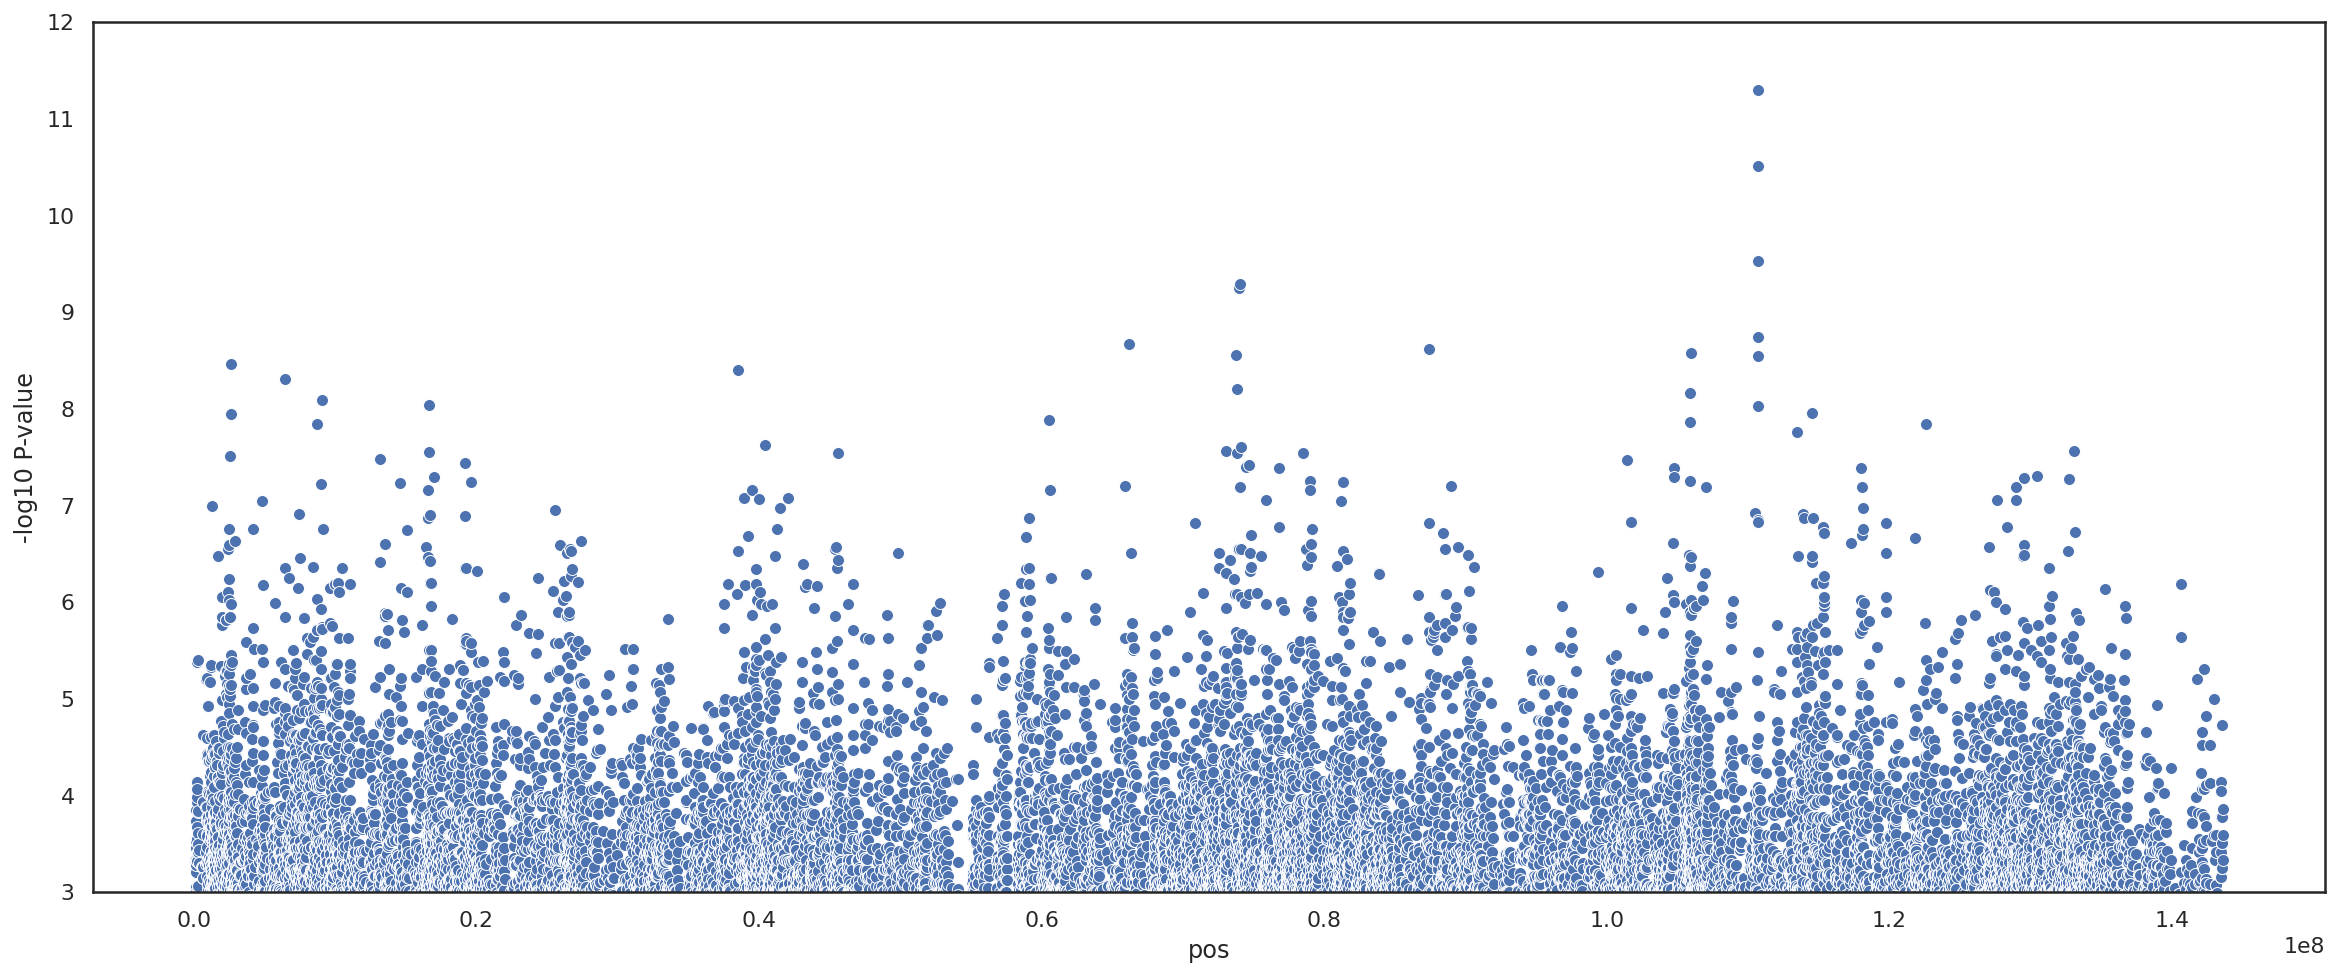

In [10]:
plt.figure(figsize=(20,8))
g = sns.scatterplot(data=relate_sele, x="pos", y="-log10 P-value")
g.set(ylim=(3, 12))

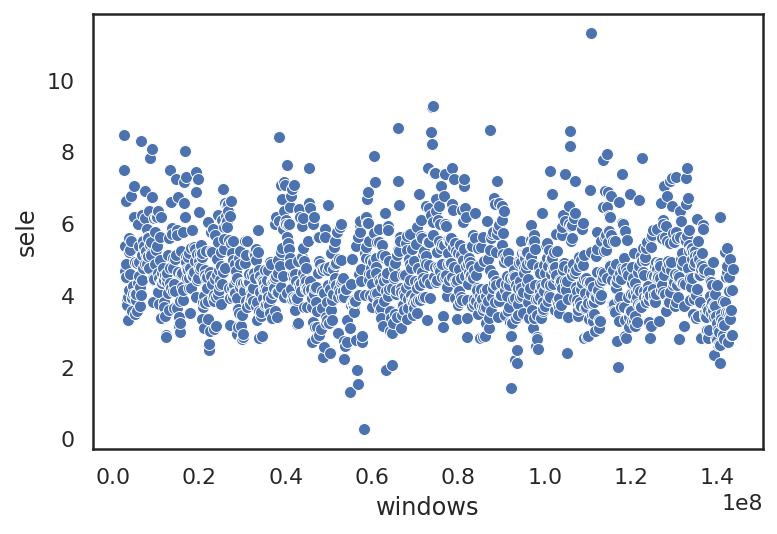

In [11]:
g = sns.scatterplot(data=chrX_df, x="windows", y="sele")

<AxesSubplot:xlabel='percent_north', ylabel='Count'>

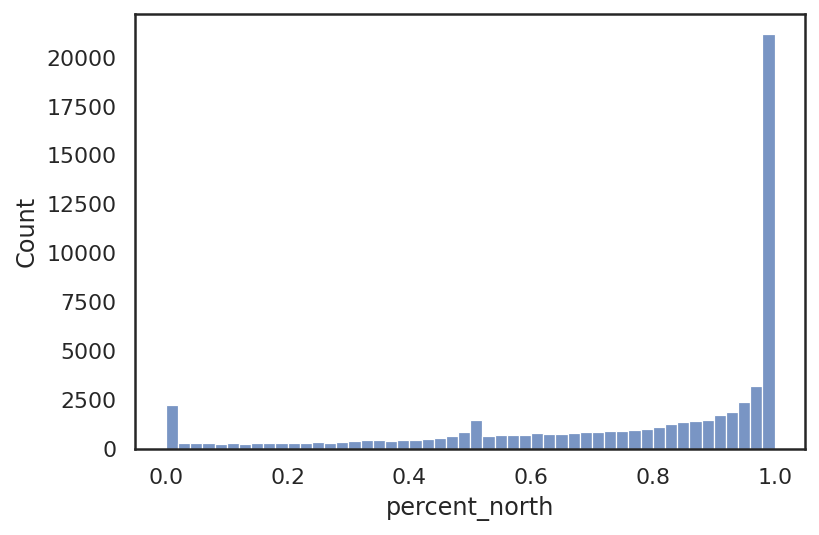

In [12]:
sns.histplot(data=chrX_df, x="percent_north")

In [13]:
chrX_df.loc[chrX_df.percent_north == 1]

,index,windows,anubis_ethiopia,cyno_central,cyno_western,hamadryas,kindae,papio,ursinus,PGDP_ID,chrom,north,norm_north,percent_north,pop,start,sele
38,38,6300022,1977915.0,0.0,0.0,22085.0,0.0,0.0,0.0,PD_0199,X,2000000.0,1000000.0,1.0,"Serengeti, Tanzania",6300022,4.22975
51,51,7600022,1329154.0,0.0,0.0,670846.0,0.0,0.0,0.0,PD_0199,X,2000000.0,1000000.0,1.0,"Serengeti, Tanzania",7600022,5.14761
53,53,7800022,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,PD_0199,X,2000000.0,1000000.0,1.0,"Serengeti, Tanzania",7800022,5.83421
54,54,7900022,1988668.0,0.0,0.0,11332.0,0.0,0.0,0.0,PD_0199,X,2000000.0,1000000.0,1.0,"Serengeti, Tanzania",7900022,4.87075
55,55,8000022,1374981.0,0.0,0.0,625019.0,0.0,0.0,0.0,PD_0199,X,2000000.0,1000000.0,1.0,"Serengeti, Tanzania",8000022,5.62316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60675,1371,139600022,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,PD_0686,X,2000000.0,1000000.0,1.0,"Lake Manyara, Tanzania",139600022,3.41689
60681,1377,140200022,1000000.0,0.0,0.0,1000000.0,0.0,0.0,0.0,PD_0686,X,2000000.0,1000000.0,1.0,"Lake Manyara, Tanzania",140200022,2.61970
60692,1388,141300022,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,PD_0686,X,2000000.0,1000000.0,1.0,"Lake Manyara, Tanzania",141300022,3.27414
60701,1397,142200022,1612767.0,0.0,0.0,387233.0,0.0,0.0,0.0,PD_0686,X,2000000.0,1000000.0,1.0,"Lake Manyara, Tanzania",142200022,5.30373


qcut, so that quantiles are used. However, this leads to non-unique bins, so I will also try with cut afterwards

/scratch/5091786/ipykernel_35785/1001877501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["ancestry_group"] = pd.qcut(df_temp["percent_north"], bins, labels=False)


[Text(0.5, 1.0, 'Serengeti, Tanzania. ChrX')]

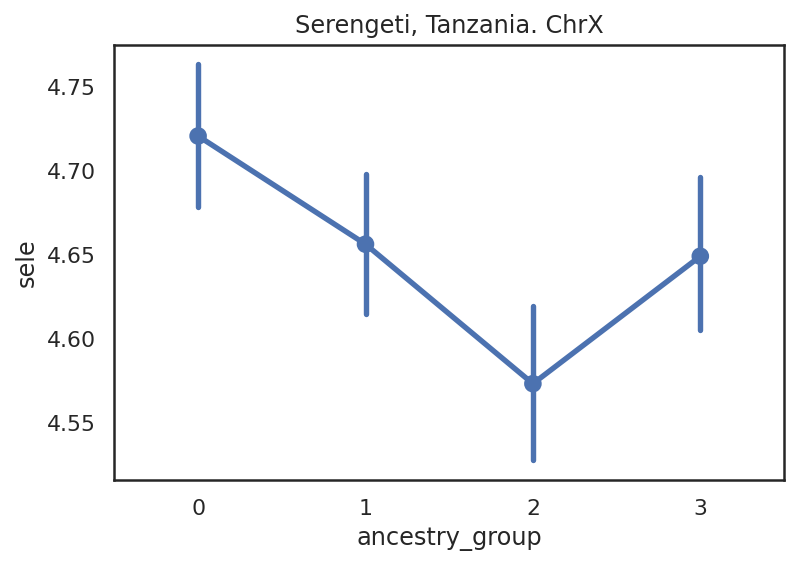

In [14]:
df_temp = chrX_df.loc[chrX_df["pop"] == "Serengeti, Tanzania"]
bins = 4
df_temp["ancestry_group"] = pd.qcut(df_temp["percent_north"], bins, labels=False)
g = sns.pointplot(data=df_temp, y="sele", x="ancestry_group", ci=95)
g.set(title="Serengeti, Tanzania. ChrX")

[Text(0.5, 1.0, 'All Olives, Tanzania. ChrX')]

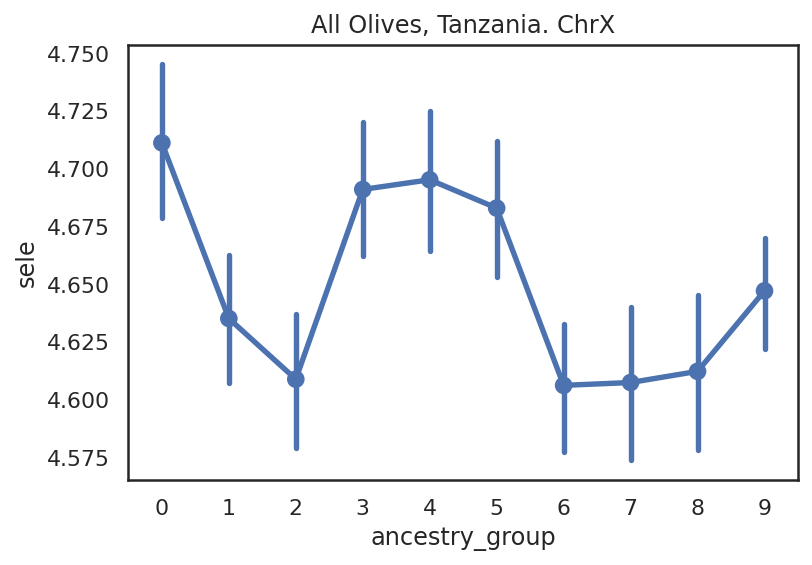

In [15]:
df_temp = chrX_df
bins = 11
df_temp["ancestry_group"] = pd.qcut(df_temp["percent_north"], bins, labels=False, duplicates="drop")
g = sns.pointplot(data=df_temp, y="sele", x="ancestry_group", ci=95)
g.set(title="All Olives, Tanzania. ChrX")

In [16]:
df_temp = chrX_df
bins = 10
df_temp["ancestry_group"] = pd.cut(df_temp["percent_north"], bins, labels=False, duplicates="drop")
df_X = df_temp

/scratch/5091786/ipykernel_35785/2818379085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["ancestry_group"] = pd.cut(df_temp["percent_north"], bins, labels=False, duplicates="drop")


[Text(0.5, 1.0, 'Serengeti, Tanzania. ChrX')]

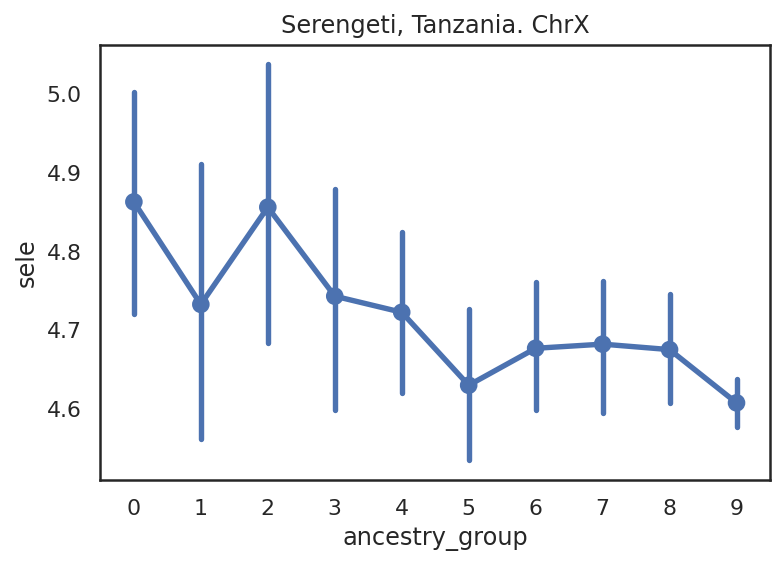

In [17]:
df_temp = chrX_df.loc[chrX_df["pop"] == "Serengeti, Tanzania"]
bins = 10
df_temp["ancestry_group"] = pd.cut(df_temp["percent_north"], bins, labels=False, duplicates="drop")
g = sns.pointplot(data=df_temp, y="sele", x="ancestry_group", ci=95)
g.set(title="Serengeti, Tanzania. ChrX")

[Text(0.5, 1.0, 'All Olives, Tanzania ChrX')]

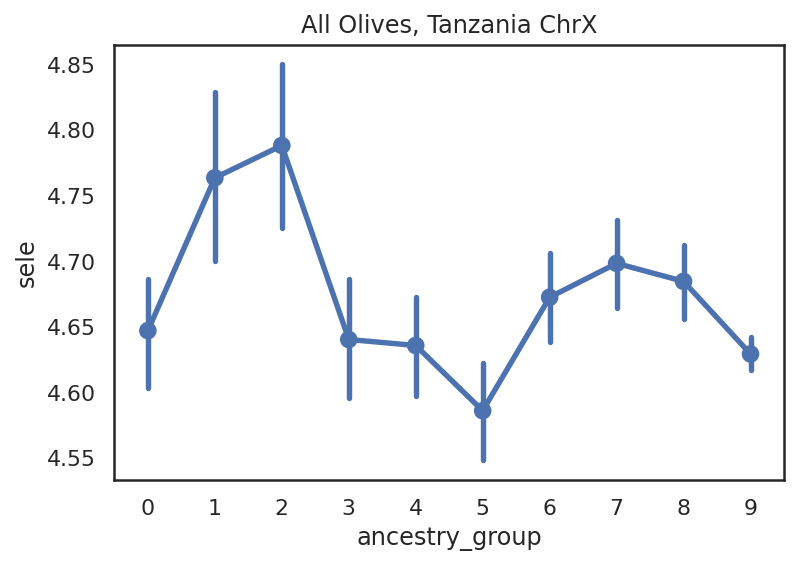

In [18]:
df_temp = chrX_df
bins = 10
df_temp["ancestry_group"] = pd.cut(df_temp["percent_north"], bins, labels=False, duplicates="drop")
g = sns.pointplot(data=df_temp, y="sele", x="ancestry_group", ci=95)
g.set(title="All Olives, Tanzania ChrX")

Checking the 7 cluster paintings

In [19]:
idfile_path = "/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/idfile_7_cluster_females.ids"
idfile = pd.read_csv(idfile_path, sep=" ", names=["PGDP_ID", "pop", "inclusion"])
idfile["ID_index"] = idfile.index
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")
mapping = {}
for i, row in meta_data_samples.iterrows():
    if row.PGDP_ID[0] != "P":
        mapping["Sci_"+row.PGDP_ID] = row.Origin
    else:
        mapping[row.PGDP_ID] = row.Origin

In [20]:
df_l = []
baboon_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis"
for population in ['cyno_anubis_t']:
    for chrom in ["8", "X"]:
        for ind in idfile.loc[(idfile["pop"] == population) & (idfile.inclusion == 1)].PGDP_ID:
            name = population+"_chr"+chrom+"_7_cluster_"+ind+".txt"
            ind_df = pd.read_csv(baboon_path+"/steps/paint_summary/"+name, sep=" ")
            ind_df["PGDP_ID"] = ind
            ind_df["chrom"] = chrom
            df_l.append(ind_df)
a_7_df = pd.concat(df_l)
a_7_df["north"] = a_7_df.anubis_ethiopia+a_7_df.hamadryas+a_7_df.papio
a_7_df["norm_north"] = (a_7_df.north-a_7_df.iloc[:,1:8].sum(axis=1)/2)
a_7_df["percent_north"] = (a_7_df.north/a_7_df.iloc[:,1:8].sum(axis=1))
a_7_df["pop"] = a_7_df["PGDP_ID"].map(mapping)
a_7_df["start"] = a_7_df["windows"]

/scratch/5091786/ipykernel_35785/145890758.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a_7_df["norm_north"] = (a_7_df.north-a_7_df.iloc[:,1:8].sum(axis=1)/2)
/scratch/5091786/ipykernel_35785/145890758.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a_7_df["percent_north"] = (a_7_df.north/a_7_df.iloc[:,1:8].sum(axis=1))


In [21]:
a_7_df

,windows,anubis_ethiopia,cyno_western,hamadryas,kindae,papio,ursinus,PGDP_ID,chrom,north,norm_north,percent_north,pop,start
0,4254,527600.0,201425.0,197419.0,491742.0,162902.0,418912.0,Sci_16066,8,887921.0,-112079.0,0.443960,"Mikumi, Tanzania",4254
1,104254,75908.0,130621.0,299372.0,946259.0,13065.0,534775.0,Sci_16066,8,388345.0,-611655.0,0.194172,"Mikumi, Tanzania",104254
2,204254,241645.0,50816.0,89949.0,1326419.0,48535.0,242636.0,Sci_16066,8,380129.0,-619871.0,0.190064,"Mikumi, Tanzania",204254
3,304254,214061.0,45277.0,12540.0,1538169.0,2923.0,187030.0,Sci_16066,8,229524.0,-770476.0,0.114762,"Mikumi, Tanzania",304254
4,404254,30638.0,325869.0,266270.0,1039108.0,5195.0,332920.0,Sci_16066,8,302103.0,-697897.0,0.151052,"Mikumi, Tanzania",404254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,143200022,0.0,1240045.0,0.0,759955.0,0.0,0.0,PD_0774,X,0.0,-1000000.0,0.000000,"Mikumi, Tanzania",143200022
1408,143300022,0.0,86237.0,0.0,1913763.0,0.0,0.0,PD_0774,X,0.0,-1000000.0,0.000000,"Mikumi, Tanzania",143300022
1409,143400022,0.0,789513.0,0.0,1210080.0,216.0,191.0,PD_0774,X,216.0,-999784.0,0.000108,"Mikumi, Tanzania",143400022
1410,143500022,37980.0,1461287.0,342.0,499746.0,0.0,645.0,PD_0774,X,38322.0,-961678.0,0.019161,"Mikumi, Tanzania",143500022


In [22]:
olives = meta_data_samples.loc[meta_data_samples.Species == "anubis"].PGDP_ID
olives
yellows = meta_data_samples.loc[meta_data_samples.Species == "cynocephalus"].PGDP_ID
yellows

0        16066
1        16098
24     PD_0213
25     PD_0214
26     PD_0215
        ...   
203    PD_0771
204    PD_0772
205    PD_0773
206    PD_0774
207    PD_0775
Name: PGDP_ID, Length: 62, dtype: object

Checking ancestry correlation between yellows and olives. Removing Tarangire, as they are too recently admixed.

In [23]:
a_7_df["pop"].unique()

array(['Mikumi, Tanzania', 'Serengeti, Tanzania', 'Arusha, Tanzania',
       'Ngorongoro, Tanzania', 'Ruaha, Tanzania', 'Gombe, Tanzania',
       'Udzungwa, Tanzania', 'Selous, Tanzania', 'Lake Manyara, Tanzania',
       'Tarangire, Tanzania'], dtype=object)

In [24]:
chrX_df_olive = a_7_df.loc[(a_7_df.chrom == "X") & (a_7_df.PGDP_ID.isin(olives)
                                                    & (a_7_df["pop"] == "Serengeti, Tanzania"))]
chrX_df_yellow = a_7_df.loc[(a_7_df.chrom == "X") & (a_7_df.PGDP_ID.isin(yellows)
                                                    & (a_7_df["pop"].isin(['Udzungwa, Tanzania', 'Selous, Tanzania'])))]
yellow_mean = chrX_df_yellow.groupby(["windows"]).mean()
olive_mean = chrX_df_olive.groupby(["windows"]).mean()

[Text(0.5, 1.0, '0 is fully southern ancestry, 1 is fully northern ancestry')]

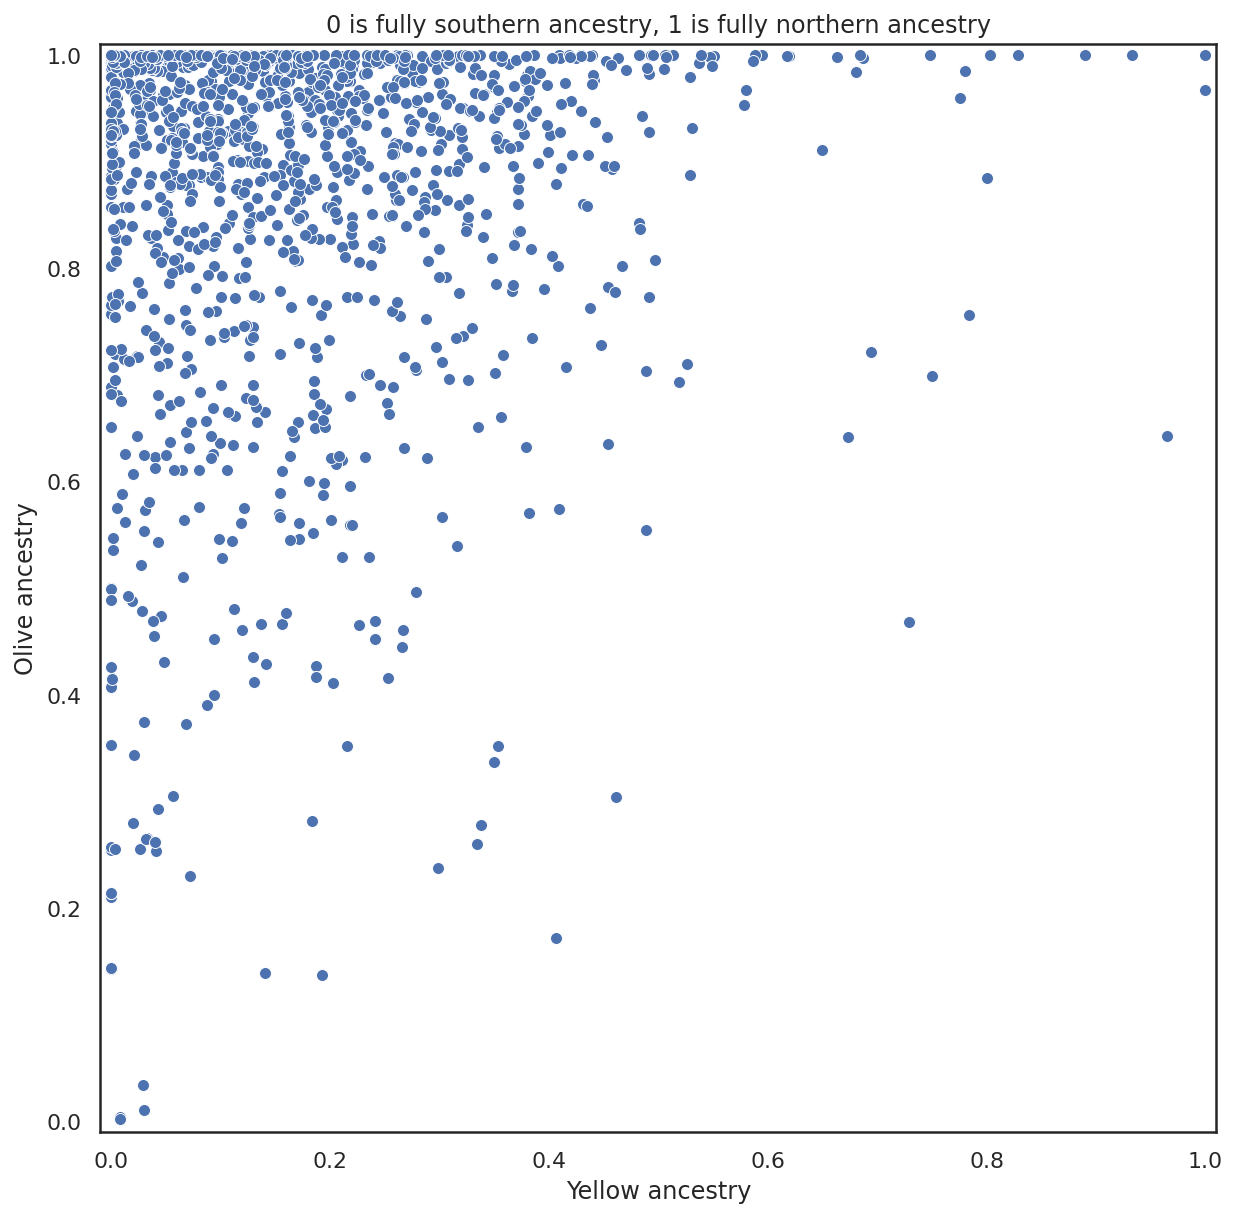

In [25]:
plt.figure(figsize=(10,10))
g = sns.scatterplot(x=yellow_mean.percent_north, y=olive_mean.percent_north)
g.set(xlim=(-0.01,1.01), ylim=(-0.01,1.01))
g.set(xlabel="Yellow ancestry")
g.set(ylabel="Olive ancestry")
g.set(title="0 is fully southern ancestry, 1 is fully northern ancestry")

Ancestry along chrX

[Text(0, 0.5, 'Ancestry')]

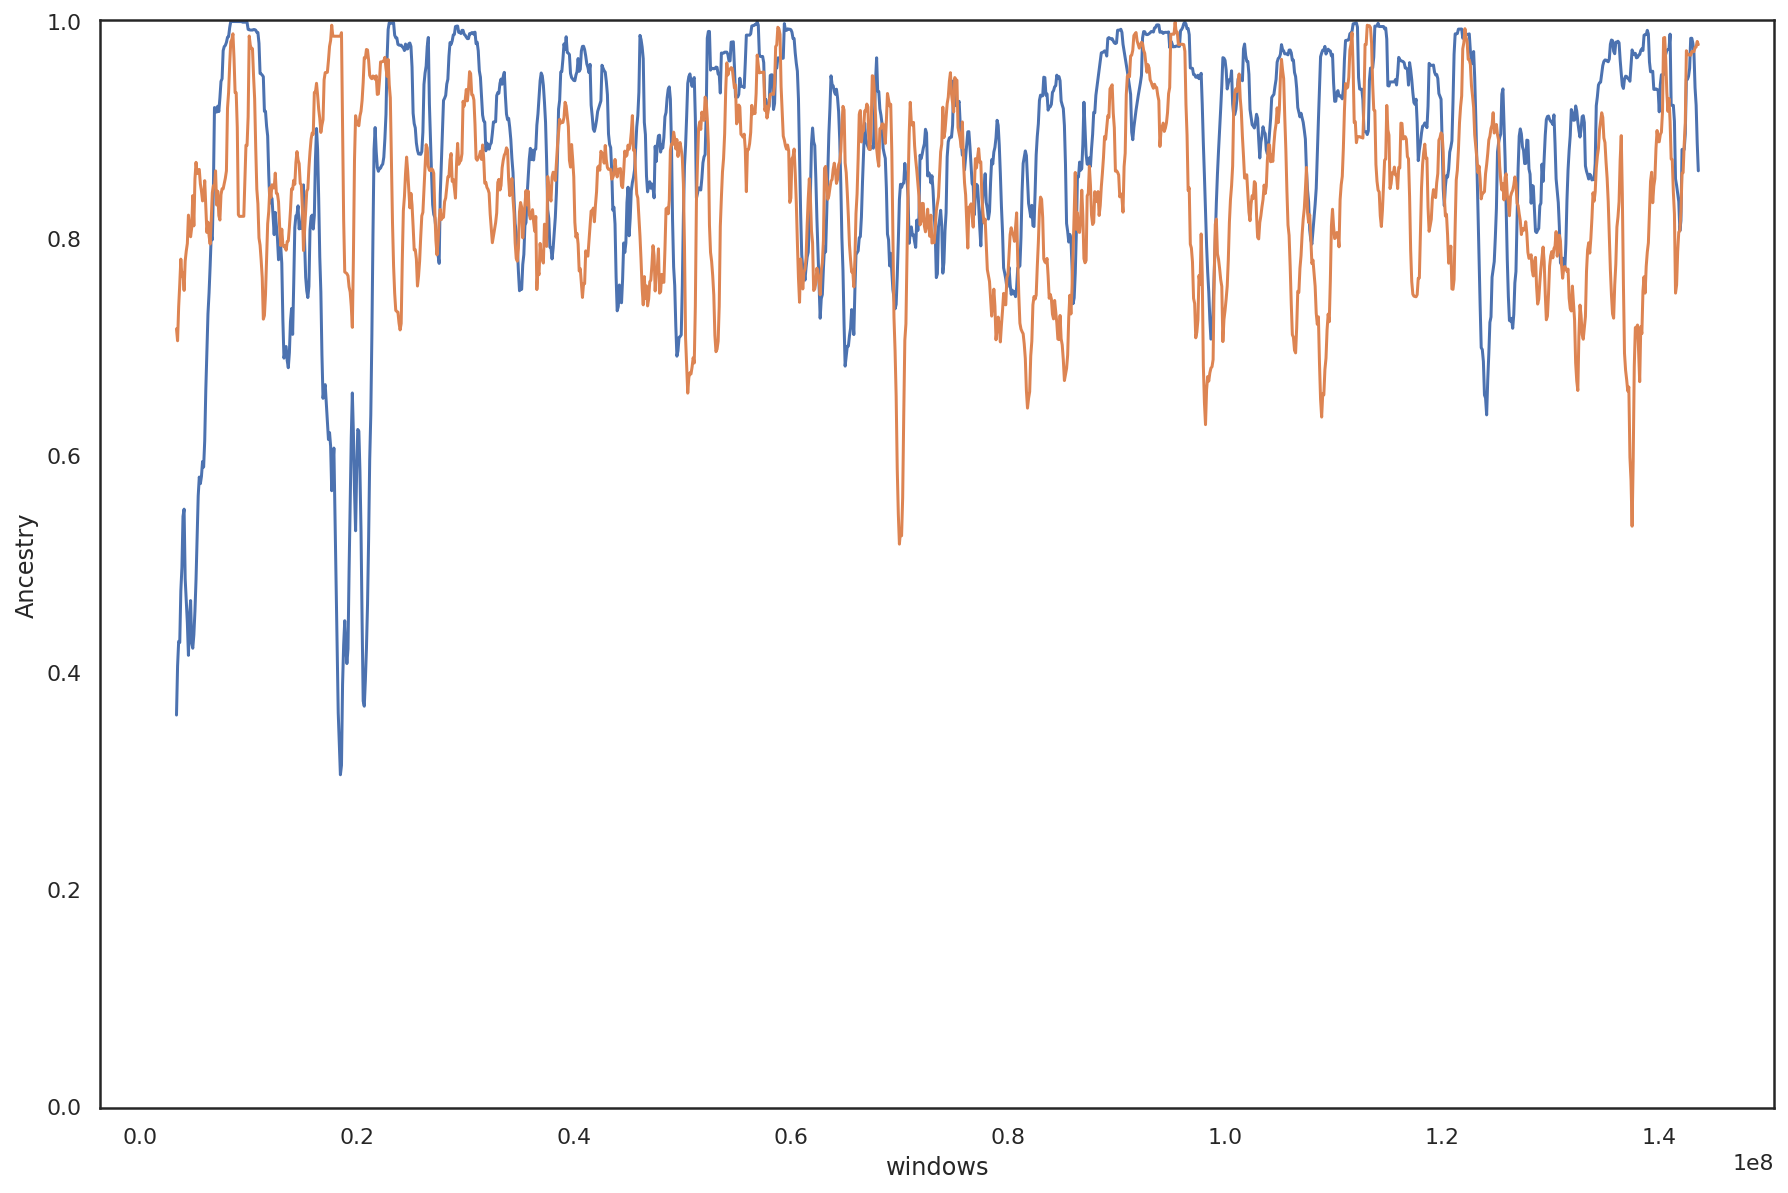

In [26]:
roll_size = 10
plt.figure(figsize=(15,10))
g = sns.lineplot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
g = sns.lineplot(data=1-yellow_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
g.set(ylim=(-0.001,1.001))
g.set(ylabel="Ancestry")

[Text(0, 0.5, 'Ancestry')]

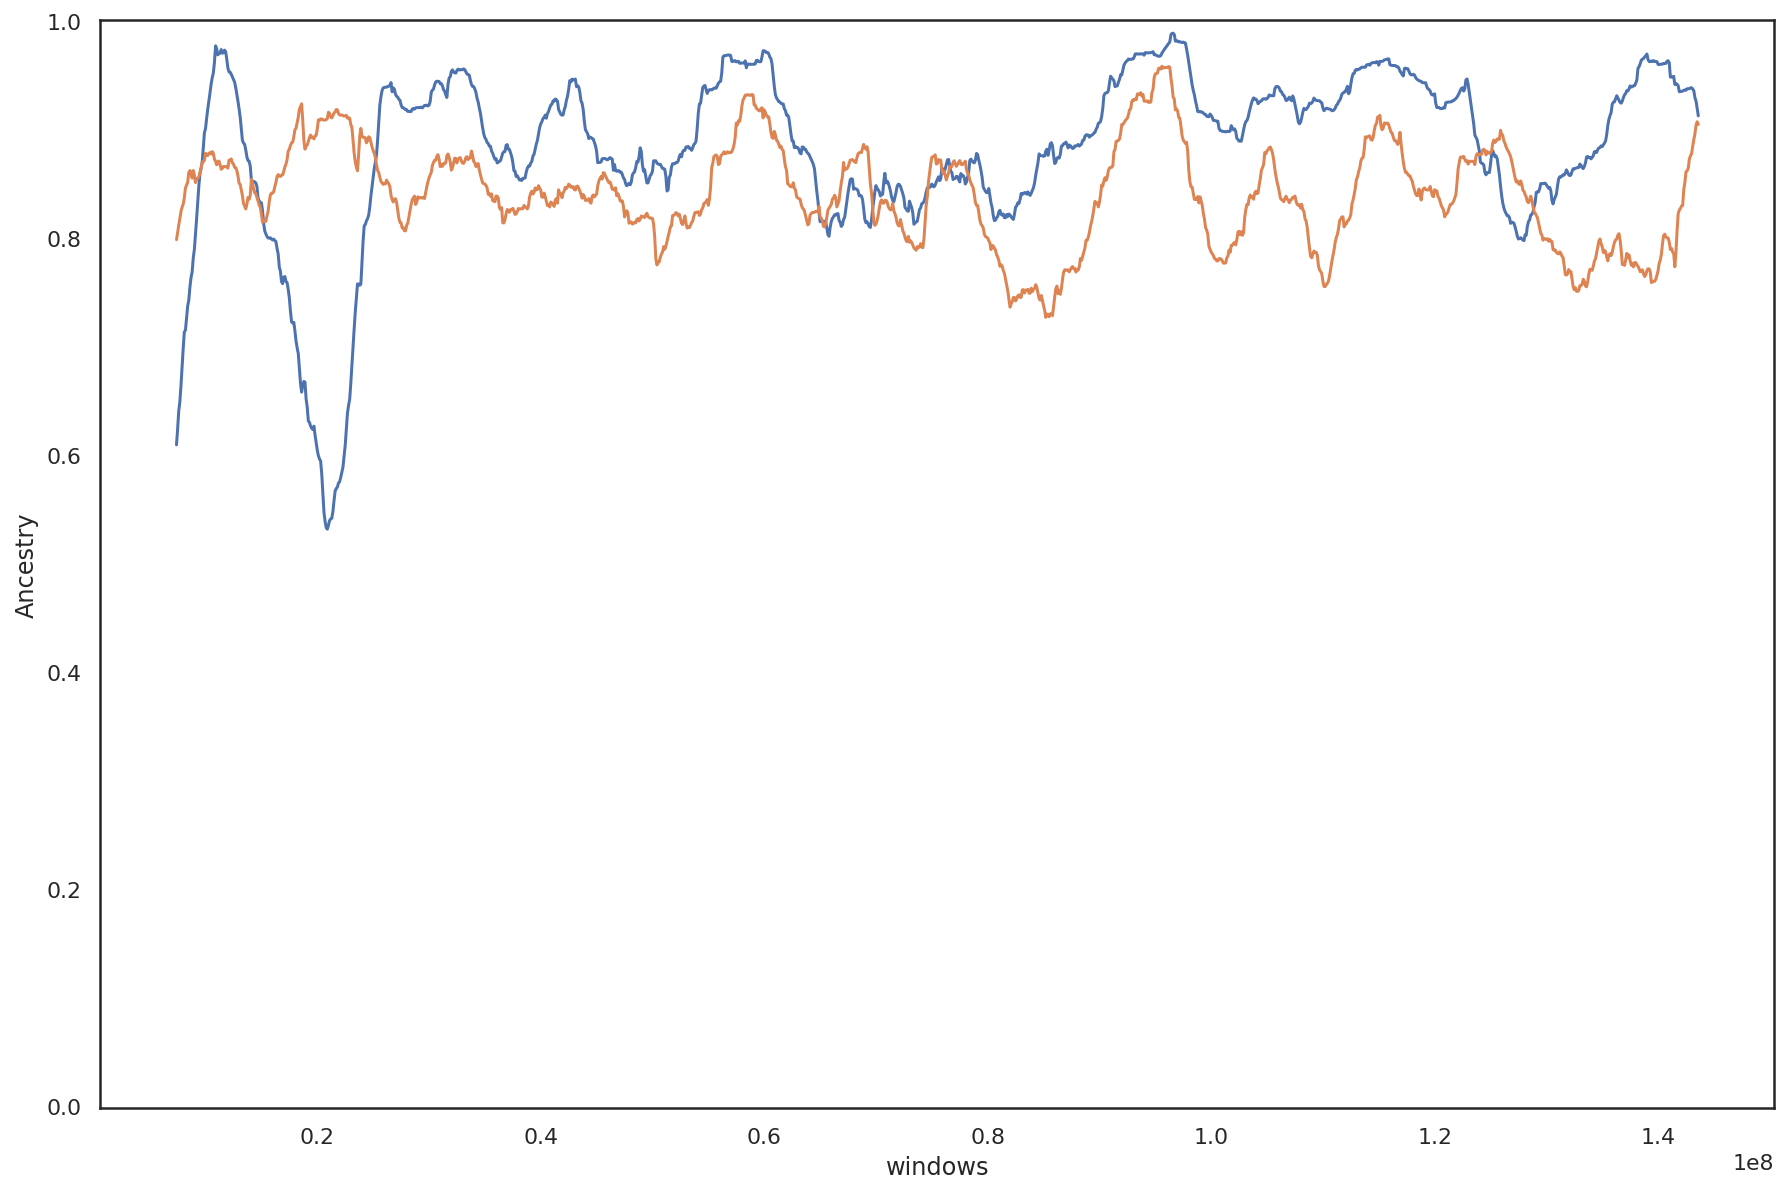

In [27]:
roll_size = 50
plt.figure(figsize=(15,10))
g = sns.lineplot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
g = sns.lineplot(data=1-yellow_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
g.set(ylim=(-0.001,1.001))
g.set(ylabel="Ancestry")

Correlation

In [28]:
np.corrcoef(x=yellow_mean.percent_north, y=olive_mean.percent_north)

array([[1.        , 0.01779576],
       [0.01779576, 1.        ]])

In [29]:
from scipy import stats

Rolling mean

In [30]:
#Removing the leading NaNs from the rolling function
roll_size = 1
o_roll = olive_mean.rolling(roll_size).mean().percent_north
o_roll_no_na = o_roll[~np.isnan(o_roll)]
y_roll = yellow_mean.rolling(roll_size).mean().percent_north
y_roll_no_na = y_roll[~np.isnan(y_roll)]

In [31]:
#from scipy import stats
stats.spearmanr(o_roll_no_na, 1-y_roll_no_na)

SpearmanrResult(correlation=0.15236687176913458, pvalue=8.716480618209132e-09)

Chr8 check

In [32]:
chr8_df_olive = a_7_df.loc[(a_7_df.chrom == "8") & (a_7_df.PGDP_ID.isin(olives)
                                                    & (a_7_df["pop"] != "Tarangire, Tanzania"))]
chr8_df_yellow = a_7_df.loc[(a_7_df.chrom == "8") & (a_7_df.PGDP_ID.isin(yellows)
                                                    & (a_7_df["pop"].isin(['Udzungwa, Tanzania', 'Selous, Tanzania'])))]
yellow_mean = chr8_df_yellow.groupby(["windows"]).mean()
olive_mean = chr8_df_olive.groupby(["windows"]).mean()

[Text(0, 0.5, 'Ancestry')]

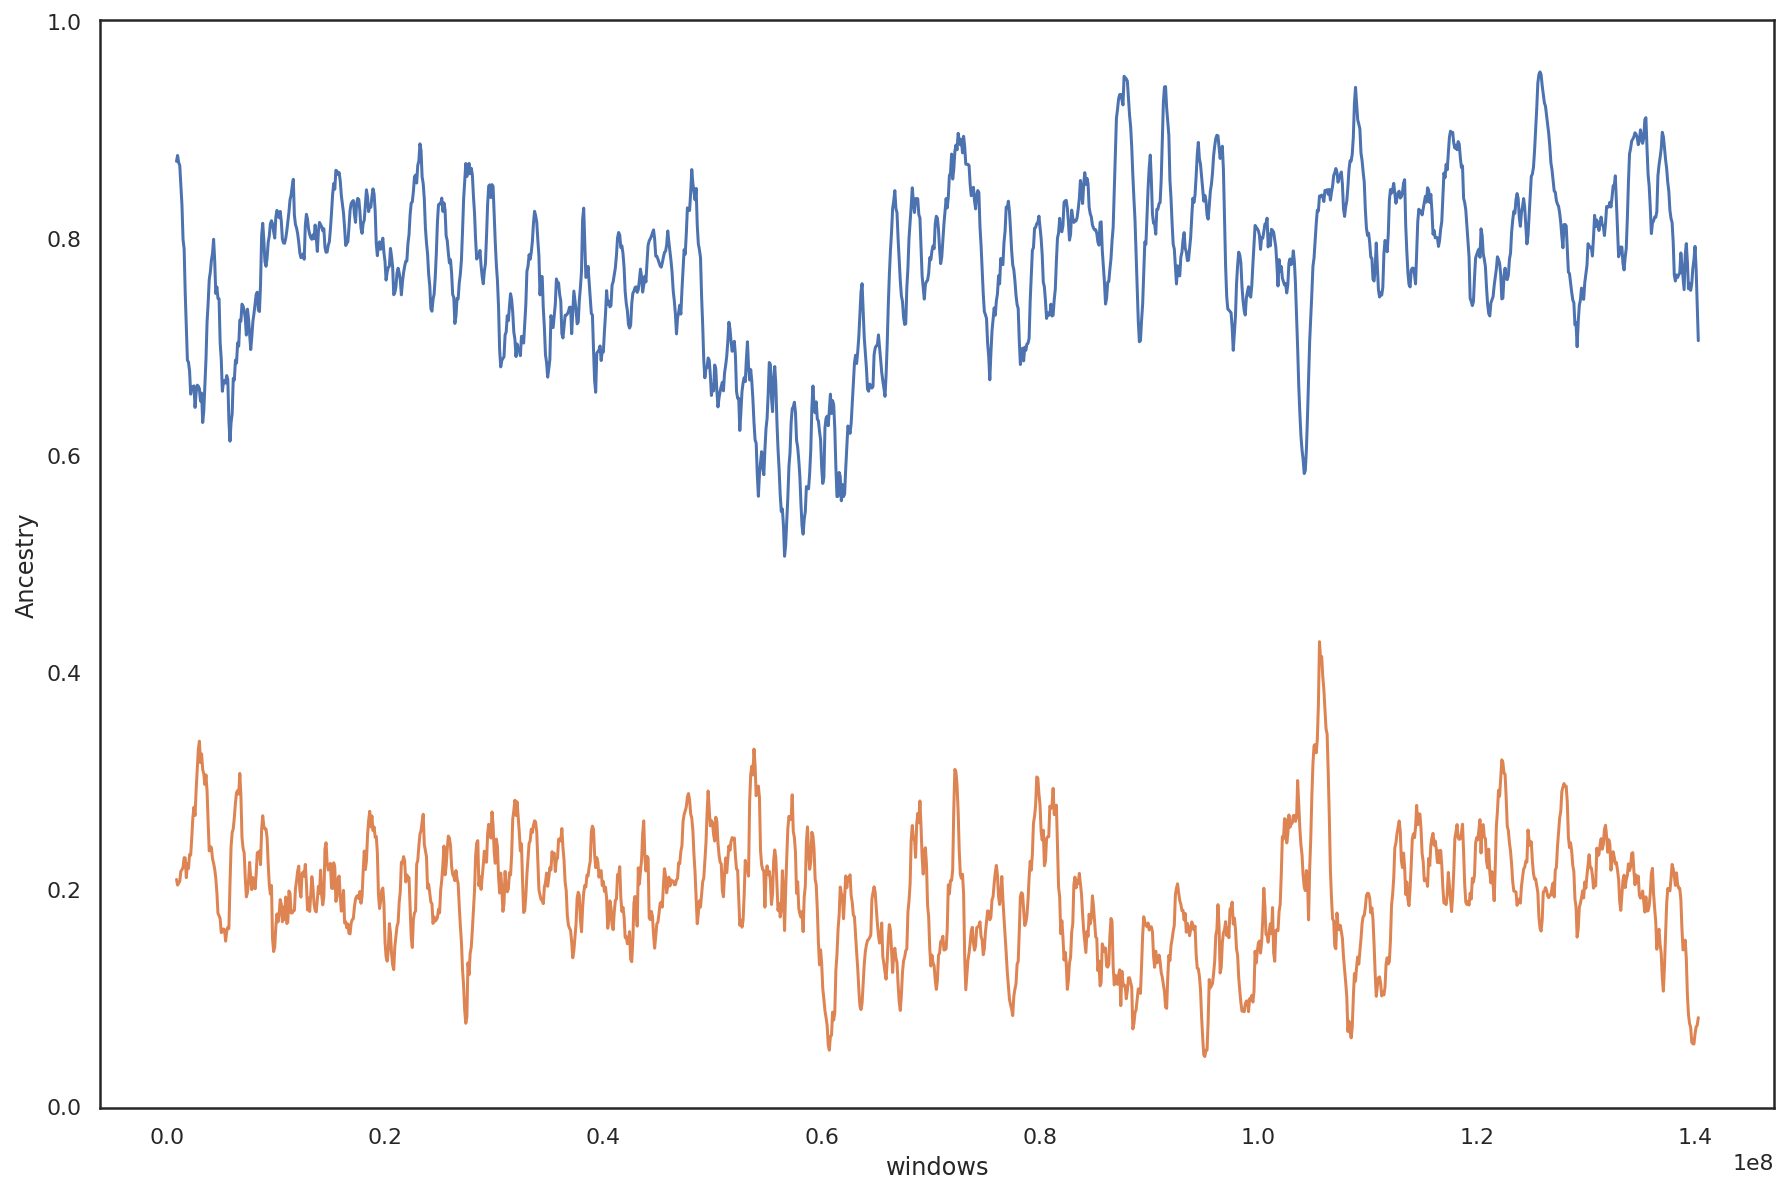

In [33]:
roll_size = 10
plt.figure(figsize=(15,10))
g = sns.lineplot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
g = sns.lineplot(data=yellow_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
g.set(ylim=(-0.001,1.001))
g.set(ylabel="Ancestry")

In [34]:
#Removing the leading NaNs from the rolling function
roll_size = 10
o_roll = olive_mean.rolling(roll_size).mean().percent_north
o_roll_no_na = o_roll[~np.isnan(o_roll)]
y_roll = yellow_mean.rolling(roll_size).mean().percent_north
y_roll_no_na = y_roll[~np.isnan(y_roll)]
stats.spearmanr(o_roll_no_na, 1-y_roll_no_na)

SpearmanrResult(correlation=0.13355876347865442, pvalue=5.547120534424895e-07)

Adding sele data.

In [35]:
chrX_df_olive = a_7_df.loc[(a_7_df.chrom == "X") & (a_7_df.PGDP_ID.isin(olives))]
chrX_df_yellow = a_7_df.loc[(a_7_df.chrom == "X") & (a_7_df.PGDP_ID.isin(yellows))]
chrX_df_olive["sele"] = -chrX_df_olive.windows.map(window_dir)
chrX_df_yellow["sele"] = -chrX_df_yellow.windows.map(window_dir)

/scratch/5091786/ipykernel_35785/2710519492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chrX_df_olive["sele"] = -chrX_df_olive.windows.map(window_dir)
/scratch/5091786/ipykernel_35785/2710519492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chrX_df_yellow["sele"] = -chrX_df_yellow.windows.map(window_dir)


In [36]:
chrX_df = a_7_df.loc[(a_7_df.chrom == "X") & (a_7_df.PGDP_ID.isin(olives))]
windows = sorted(chrX_df.windows.unique())
chrX_df["sele"] = -chrX_df.windows.map(window_dir)

/scratch/5091786/ipykernel_35785/2343775981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chrX_df["sele"] = -chrX_df.windows.map(window_dir)


/scratch/5091786/ipykernel_35785/3939304844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["ancestry_group"] = pd.qcut(df_temp["percent_north"], bins, labels=False, duplicates="drop")


[Text(0.5, 1.0, 'All Olives, Tanzania. ChrX')]

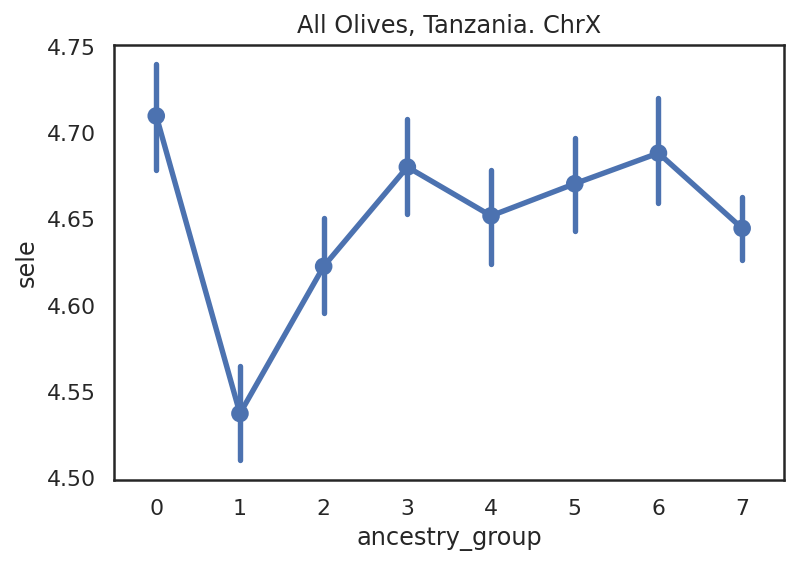

In [37]:
df_temp = chrX_df
bins = 10
df_temp["ancestry_group"] = pd.qcut(df_temp["percent_north"], bins, labels=False, duplicates="drop")
g = sns.pointplot(data=df_temp, y="sele", x="ancestry_group", ci=95)
g.set(title="All Olives, Tanzania. ChrX")

/scratch/5091786/ipykernel_35785/4150459122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["ancestry_group"] = pd.cut(df_temp["percent_north"], bins, labels=False, duplicates="drop")


[Text(0.5, 1.0, 'All Olives, Tanzania. ChrX')]

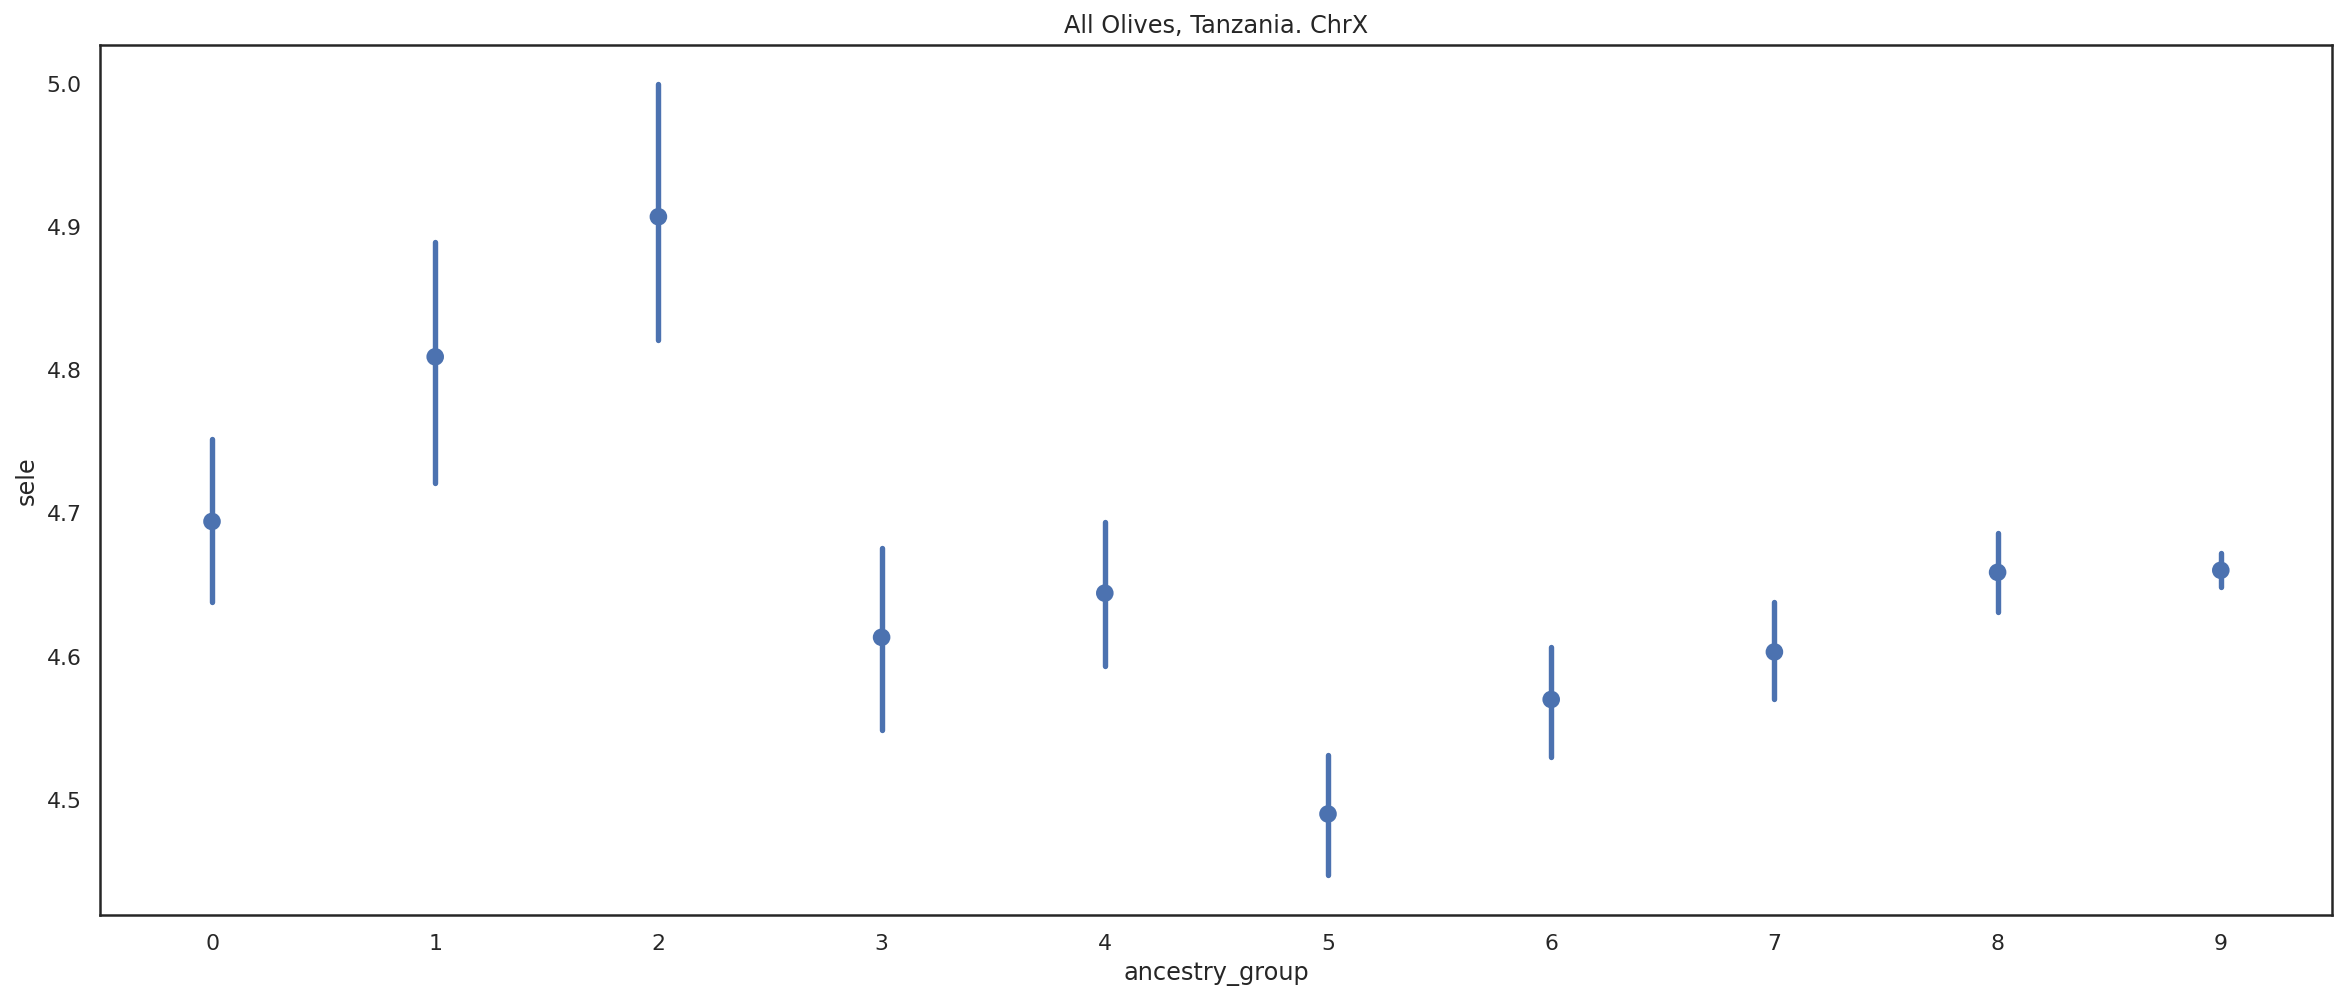

In [38]:
plt.figure(figsize=(20,8))
df_temp = chrX_df
bins = 10
df_temp["ancestry_group"] = pd.cut(df_temp["percent_north"], bins, labels=False, duplicates="drop")
g = sns.pointplot(data=df_temp, y="sele", x="ancestry_group", join=False)
g.set(title="All Olives, Tanzania. ChrX")

Trying ancestry grouping with the mean values

/scratch/5091786/ipykernel_35785/1661514926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["ancestry_group"] = pd.qcut(df_temp["percent_north"], bins, labels=False, duplicates="drop")


[Text(0.5, 1.0, 'Serengeti, Tanzania. ChrX')]

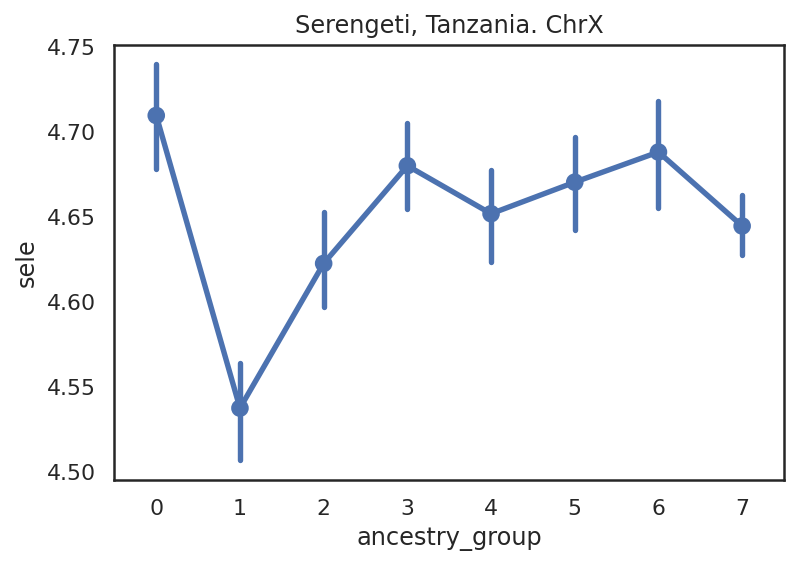

In [39]:

f_temp = chrX_df_olive.loc[chrX_df_olive["pop"] == "Serengeti, Tanzania"]
bins = 10
df_temp["ancestry_group"] = pd.qcut(df_temp["percent_north"], bins, labels=False, duplicates="drop")
g = sns.pointplot(data=df_temp, y="sele", x="ancestry_group", ci=95)
g.set(title="Serengeti, Tanzania. ChrX")